In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import mplhep as hep
from coffea.util import load
from coffea.hist import plot
import os

In [2]:
#output = load('hists_ttcom_dummy_sample.coffea')
output = load('hists_ttcom_proxy_samples_reduced.coffea')

jet_pt jet_eta


findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


jet_phi jet_mass
btagCMVA btagCSVV2


/afs/cern.ch/work/m/mmarcheg/.conda/envs/coffea/lib/python3.7/site-packages/mplhep/plot.py:590: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, None)


btagDeepB btagDeepC
btagDeepFlavB btagDeepFlavC
tau1 tau2
tau21 fatjet_pt
fatjet_eta fatjet_phi
fatjet_mass btagDDBvLV2
btagDDCvLV2 btagDDCvBV2
njet nbjet
nel nmu
lelpt lmupt


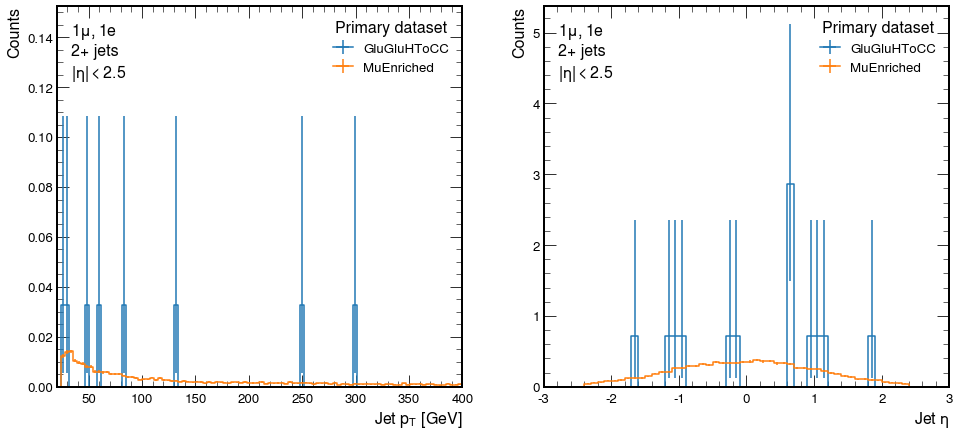

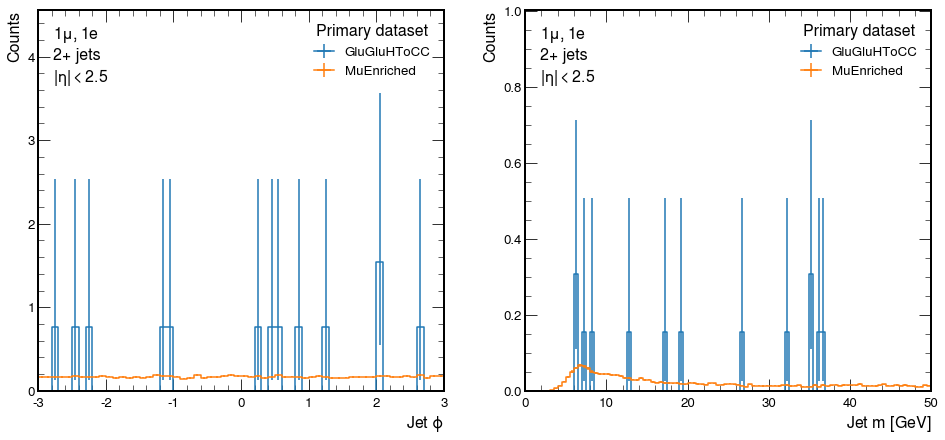

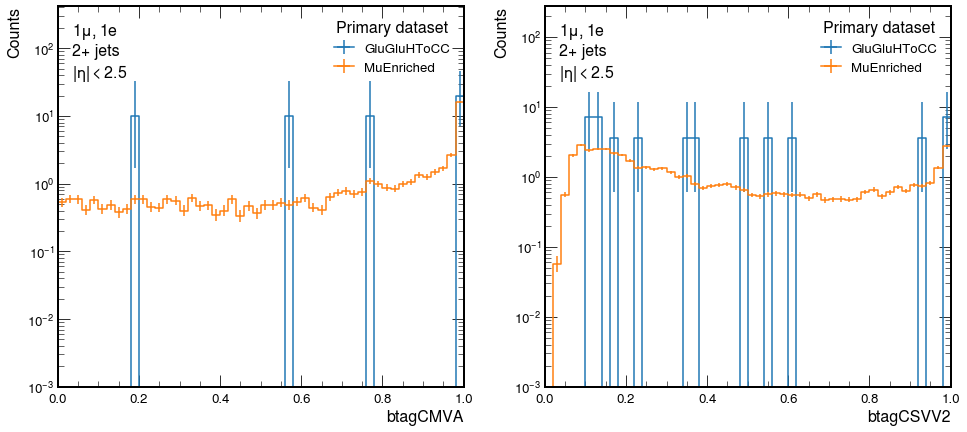

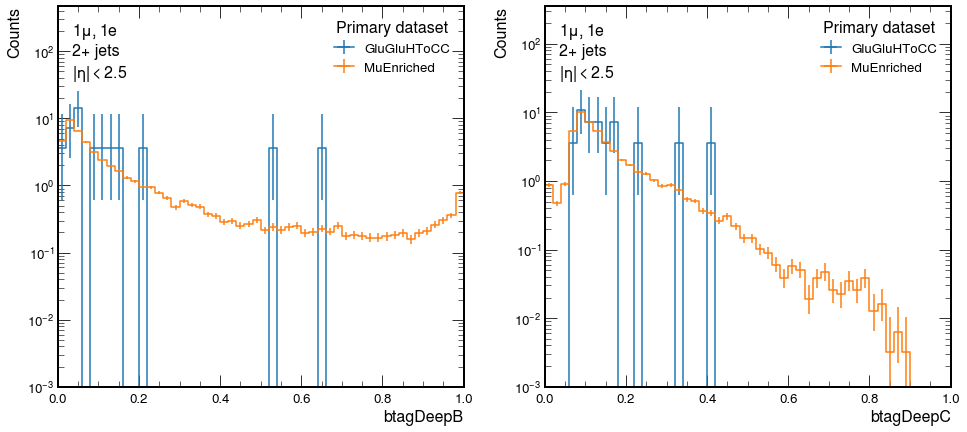

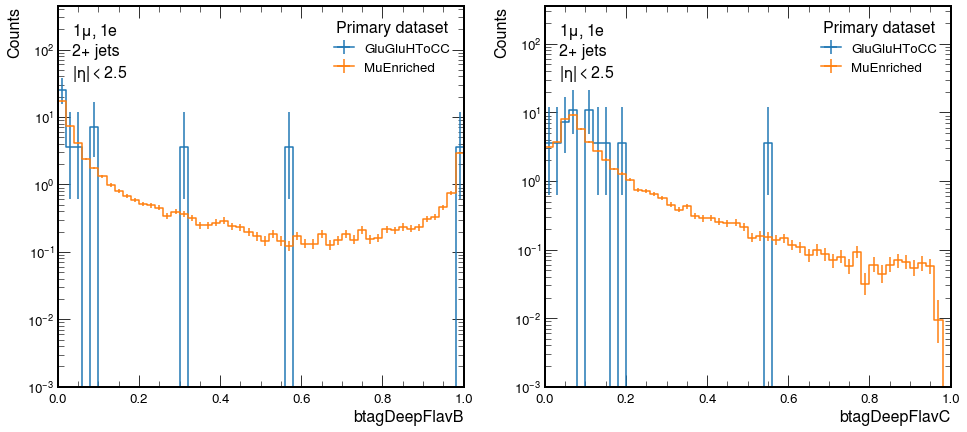

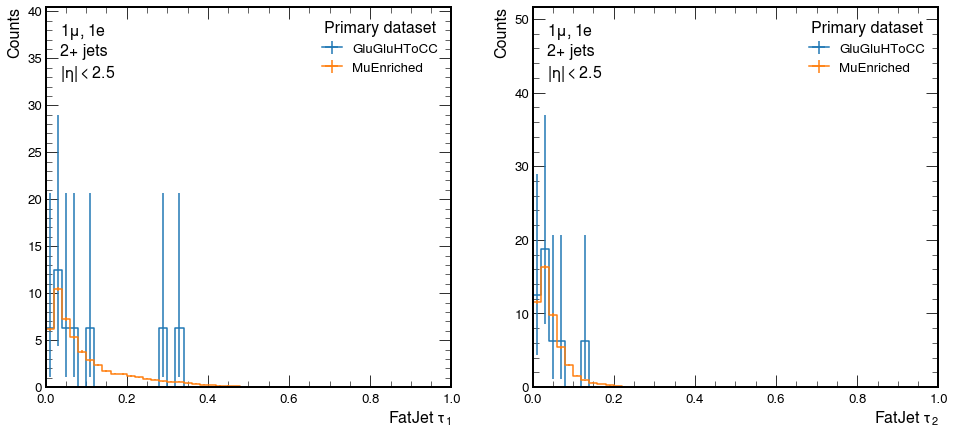

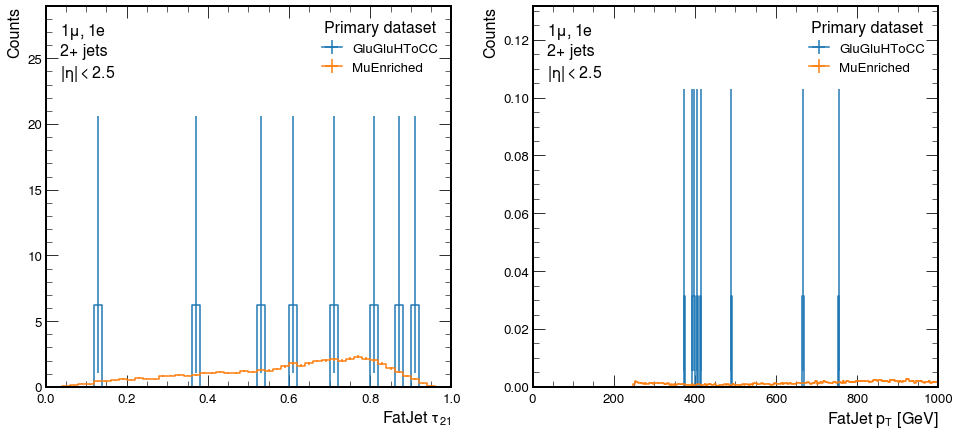

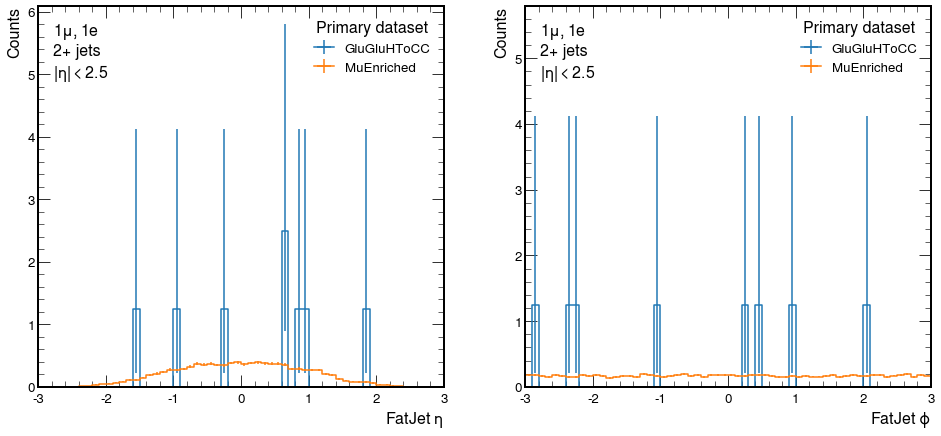

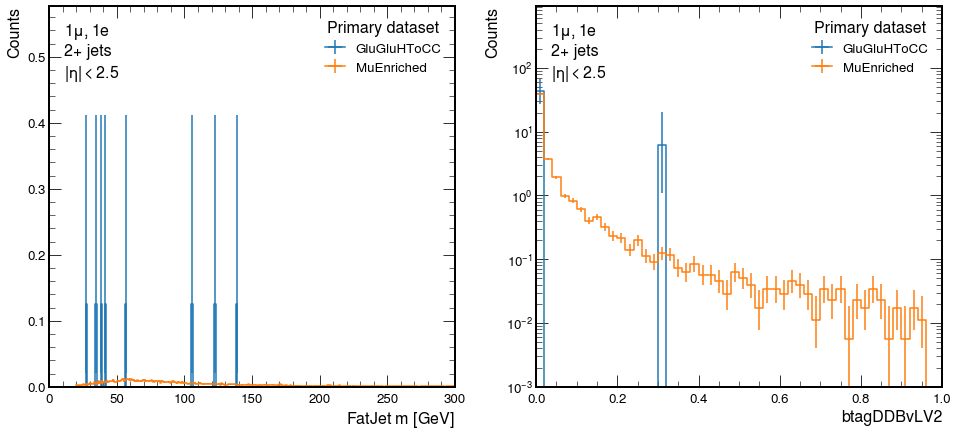

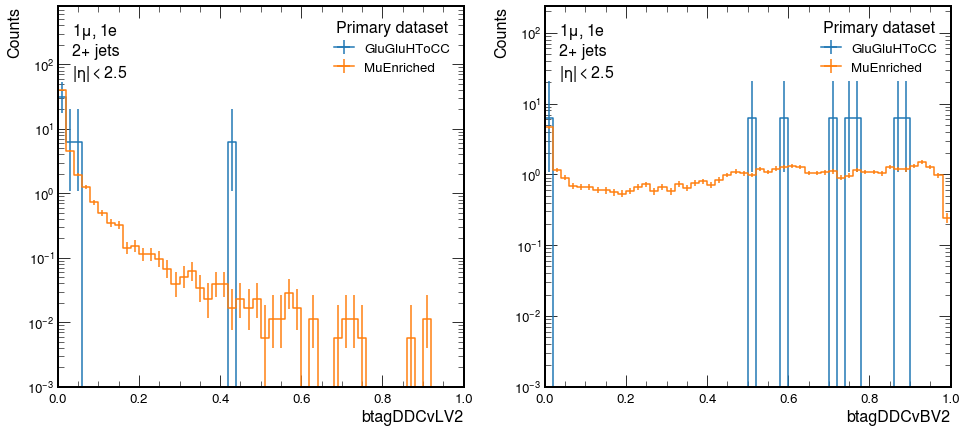

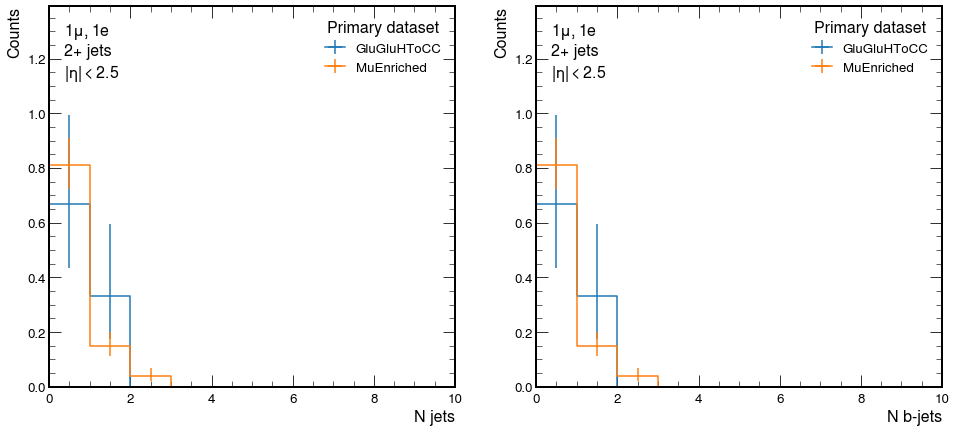

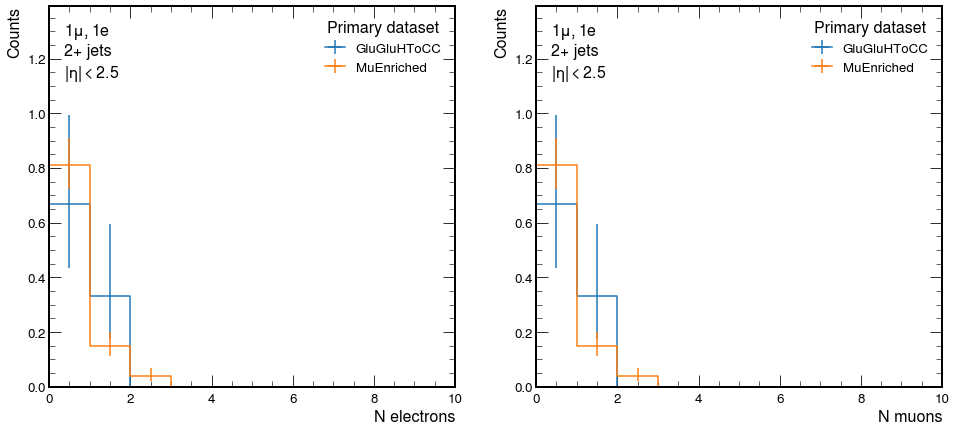

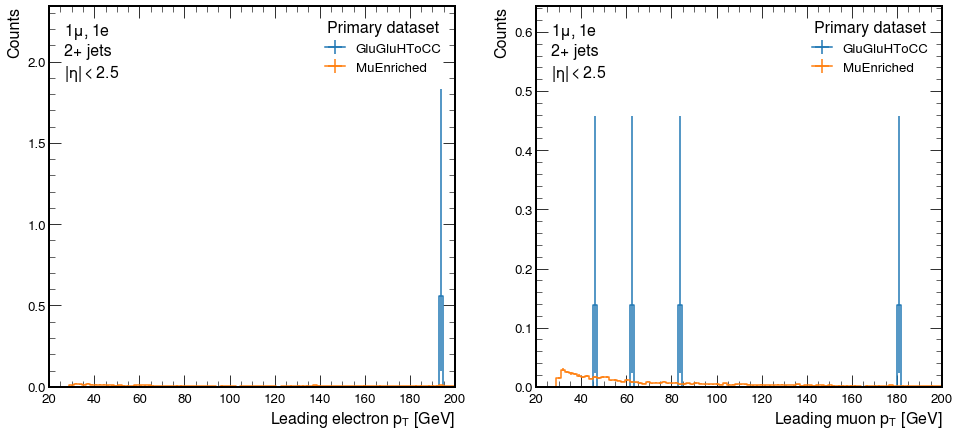

In [3]:
plt.style.use([hep.style.ROOT, {'font.size': 16}])
plot_dir = "plots/"
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

#for i in range(0, int(round(len(output.keys())))-1, 2)[2:]:
for i in range(0, int(round(len(output.keys())))-1, 2):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
    h1name = list(output.keys())[i]
    h2name = list(output.keys())[i+1]
    print(h1name, h2name)
    if any([h1name.startswith('cutflow'), h2name.startswith('cutflow')]): break
    h1 = output[h1name]
    h2 = output[h2name]
    dense = True
    
    for ax, h in zip([ax1, ax2], [h1, h2]):
        if hasattr(h, 'dim'):
            plot.plot1d(h, ax=ax, legend_opts={'loc':1}, density=dense);
        else:
            continue    
        #break
    for ax, hname in zip([ax1, ax2], [h1name, h2name]):
        at = AnchoredText(r"$1\mu, 1e$"+"\n"+
                           "2+ jets"+"\n"+
                          r"$|\eta| < 2.5$",
                           loc=2, frameon=False)
        ax.add_artist(at)
        if hname.startswith("btag"):
            ax.semilogy()
        ax.set_ylim(0.001, None)
    hep.mpl_magic(ax1)
    hep.mpl_magic(ax2)
    plt.savefig(plot_dir + h1name + "_" + h2name + ".png", dpi=300, format="png")